# Información integrantes del equipo de trabajo

**Nombre y apellidos (Grupo):**

**Nombre y apellidos (Grupo):**

**Nombre y apellidos (Grupo):**

# Ecuación del calor:


La ecuación del calor general viene dada por la expresión:

$$\frac{\partial u}{\partial t} - \alpha\nabla^2 u=Q\, ;$$ 

donde $u$ es un campo escalar de temperaturas, $\alpha$ la constante de difusividad, y $Q$ representa las fuentes de calor, sumideros, o puntos de generación de energía (producido por reacciones químicas, resistividad eléctrica, etc).Para resolver el problema de forma numérica, podemos recurrir al método de diferencias finitas, considerando que el campo escalar 

$$ u(\vec{x},t) = u^t_{i, j, k,\dots}\, $$

Remarcar que los indices $i, j, k, \dots$ hacen referencias a cada una de las componentes del vector $\vec{x}$ una vez discretizado el espacio, por ejemplo, en 2 dimensiones: $\vec{x}=(x,y)$, de forma que un punto del espacio (después de discretizar) puede identificarse como $\vec{x}_{i,j}=(x_i,y_j)$. Para el caso bidimensional en coordenadas cartesianas, tenemos

$$\frac{u^{t+1}_{i,j}-u^{t}_{i,j}}{\Delta t}-\alpha\left[\frac{u^t_{i+1,j}-2u^t_{i,j}+u^t_{i-1,j}}{\Delta x^2}+\frac{u^t_{i,j+1}-2u^t_{i,j}+u^t_{i,j-1}}{\Delta y^2}\right]=Q^t_{i,j}$$

## Condiciones de contorno fijas:


- Resolved la ecuación del calor mediante un método iterativo, en el supuesto de un cuadrado de tamaño $L=1$, en ausencia de fuentes de calor, que en el instante inicial se encuentra a temperatura 0, y cuya frontera está a temperatura constanete $T$. Representar el campo de temperaturas para un conjunto de tiempos. Tomad $\alpha=5$.

In [15]:
#Librerias
import numpy as np
from matplotlib.pyplot import imshow, title, show

#Variables globales que no cambian en el documento


#funciones
def solve_heat_equation_2D(L, T, nx, ny, nt, alpha,TB):
  dx = L / (nx - 1)
  dy = L / (ny - 1)
  dt = T / (nt - 1)

  # Initialize temperature at time t = 0
  u = np.zeros((nx, ny, nt))

  # Set boundary conditions
  u[0, :, :] = TB
  u[-1, :, :] = TB
  u[:, 0, :] = TB
  u[:, -1, :] = TB

  # Solve for temperature at each time step
  for n in range(1, nt):
    for i in range(1, nx-1):
      for j in range(1, ny-1):
        u[i, j, n] = u[i, j, n-1] + alpha * (dt / dx**2) * (u[i+1, j, n-1] - 2*u[i, j, n-1] + u[i-1, j, n-1]) + alpha * (dt / dy**2) * (u[i, j+1, n-1] - 2*u[i, j, n-1] + u[i, j-1, n-1])

  return u


def solve_heat_equation_2D_matrix(L, T, nx, ny, nt, alpha,TB):
  dx = L / (nx - 1)
  dy = L / (ny - 1)
  dt = T / (nt - 1)

  # Initialize temperature at time t = 0
  u = np.zeros((nx, ny, nt))

  # Set boundary conditions
  u[0, :, :] = TB
  u[-1, :, :] = TB
  u[:, 0, :] = TB
  u[:, -1, :] = TB

  # Assemble matrix A and right-hand side b
  A = np.zeros((nx-2, nx-2))
  b = np.zeros((nx-2, ny-2))
  for i in range(1, nx-1):
    for j in range(1, ny-1):
      A[i-1, i-1] = -2 * (dt / dx**2 + dt / dy**2)
      if i > 1:
        A[i-1, i-2] = dt / dx**2
      if i < nx-2:
        A[i-1, i] = dt / dx**2
      if j > 1:
        A[i-1, i-1] += dt / dy**2
      if j < ny-2:
        A[i-1, i-1] += dt / dy**2
      b[i-1, j-1] = u[i, j, 0] + dt / dx**2 * (u[i+1, j, 0] + u[i-1, j, 0]) + dt / dy**2 * (u[i, j+1, 0] + u[i, j-1, 0])

  # Solve for temperature at each time step
  for n in range(1, nt):
    u[1:-1, 1:-1, n] = np.linalg.solve(A, b)
    b = u[1:-1, 1:-1, n]

  return u


def heat_equation_2d(L, TB, nx, ny, nt, time, alpha):
    dx = L / (nx - 1)
    dy = L / (ny - 1)
    dt = time / (nt - 1)

    # Initialize temperature array
    T = np.zeros((ny, nx))
    
    # Set constant boundary conditions
    T[:, 0] = T[:, -1] = T[0, :] = T[-1, :] = TB
    imshow(T)
    show()
    # Iterate over time steps
    for t in range(nt):
        Tn = T.copy()
        T[1:-1, 1:-1] = (Tn[1:-1, 1:-1] + alpha * (Tn[1:-1, 2:] - 2*Tn[1:-1, 1:-1] + Tn[1:-1, :-2]) + alpha * (Tn[2:, 1:-1] - 2*Tn[1:-1, 1:-1] + Tn[:-2, 1:-1]))
    return T


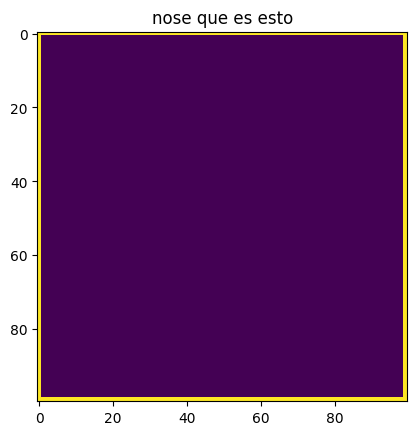

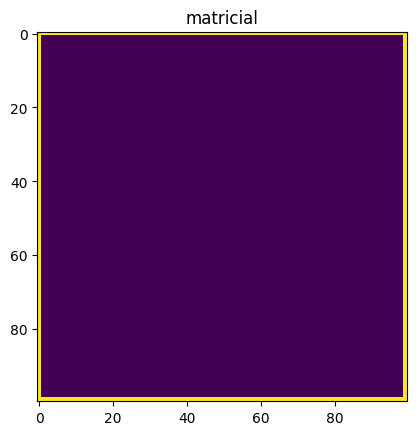

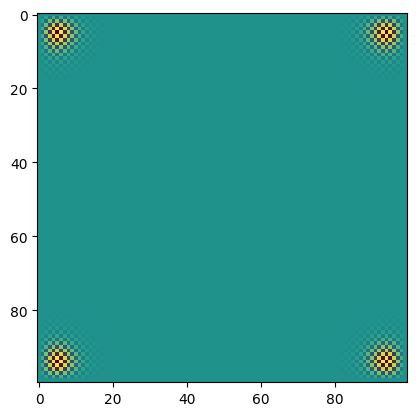

In [19]:
L=1
Time=100
nx=100
ny=100
nt=100
alpha=5
TB = 100

title('nose que es esto')
imshow(solve_heat_equation_2D_matrix(L, Time, nx, ny, nt, alpha, TB)[:,:,99])
show()

title('matricial')
imshow(heat_equation_2d(L, TB, nx, ny, nt, Time, alpha))
show()

## Fuente:

- Tomar ahora una fuente de calor fija

$$Q(x,y)=\frac{1}{C}\exp\left[-\left(\frac{x-0.5}{0.05}\right)^2\right]\exp\left[-\left(\frac{y-0.5}{0.05}\right)^2\right]\,$$

siendo $C$ una constante tal que $\max{Q(\theta,\phi)}=1\times 10^5$, y los bordes están a temperatura nula.

## Fuente en movimiento:

- Considerar que la fuente describe una trayectoria circular entorno al centro del cuadrado. **NOTA** Los factores 0.5 en $Q(x,y)$ definen el centro de la fuente de calor.

## Condiciones de contorno periódicas:

- Suponer ahora condiciones de contorno periódicas en ambas direcciones y resolver el problema cuando la fuente se mueve describiendo una hélice alrededor del toro.**NOTA** Gracias a la función módulo `%` es sencillo definir condiciones de contorno periódicas. Además, describir un movimiento helicoidal sobre un toro es equivalente a una trayectoria rectilinea en el plano con condiciones de contorno periódicas.